In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore") # Paket sürümleriyle alakalı programın çalışmasını etkilemeyen uzun uyarıları kapatır.

In [64]:
df = pd.read_csv("Mall_Customers.csv")

In [65]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Tek Değişkenli Analiz

In [66]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Histogram oluşturma

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

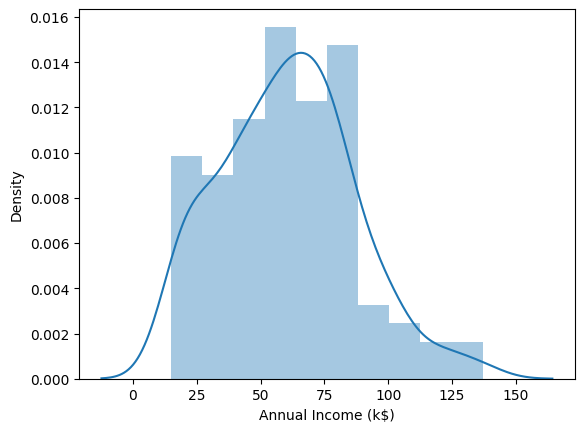

In [67]:
sns.distplot(df["Annual Income (k$)"]) #Burada distplot sürüm uyarısı veriyor warnings kütüphanesi ile önledik.

In [68]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

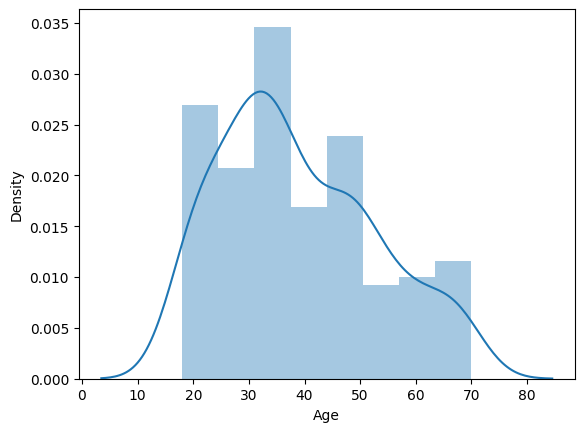

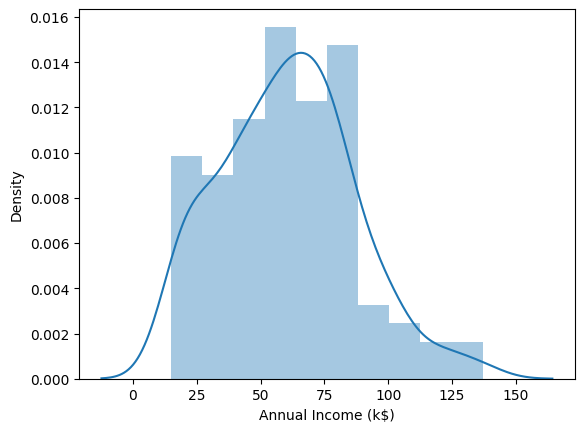

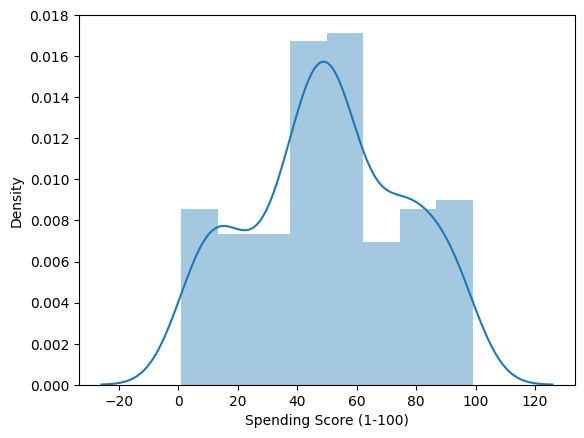

In [69]:
sütunlar = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']

for i in sütunlar:
    plt.figure()
    sns.distplot(df[i])

## Farklı türleri kdeplot ile analiz etme

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

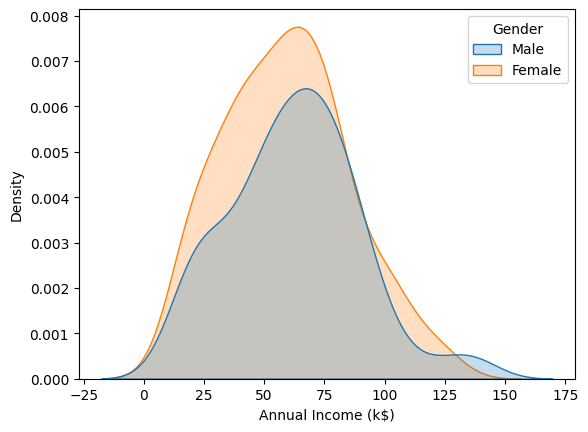

In [70]:
sns.kdeplot(data=df,x=df["Annual Income (k$)"],shade=True,hue=df["Gender"])

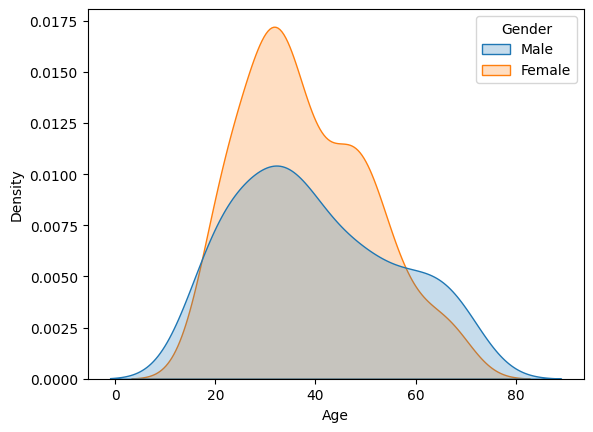

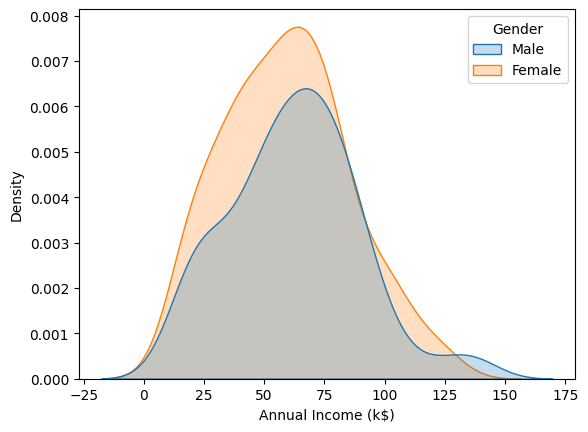

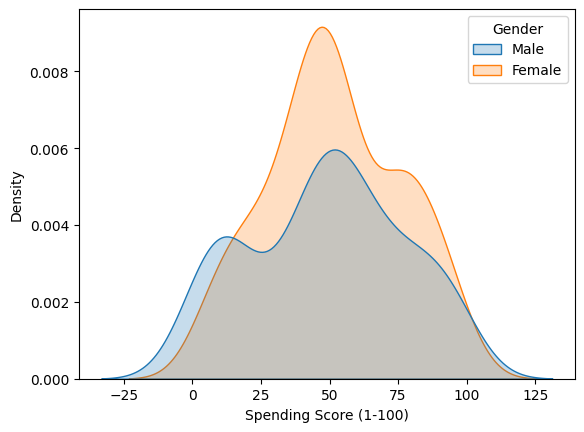

In [71]:
for i in sütunlar:
    plt.figure()
    sns.kdeplot(data=df, x=i, shade=True, hue='Gender')

## Farklı türleri boxplot ile analiz etme

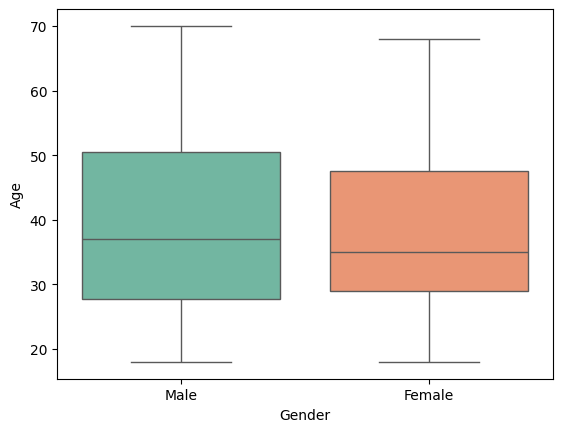

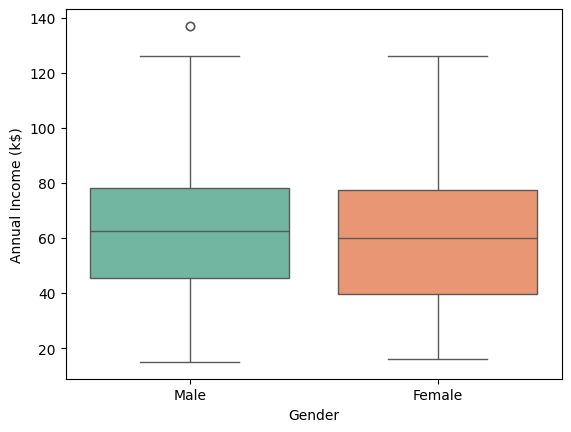

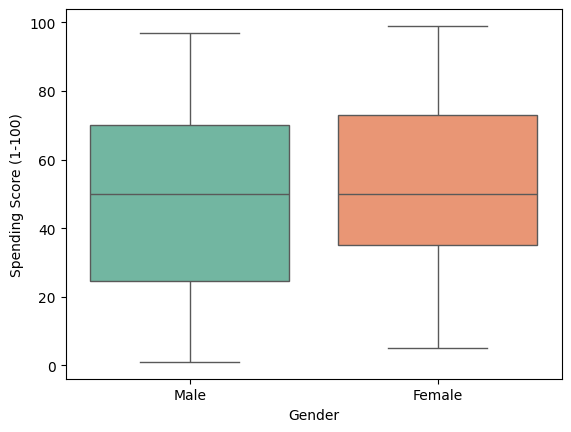

In [72]:
for i in sütunlar:
    plt.figure()
    sns.boxplot(data=df, x="Gender"  ,y=df[i] ,palette="Set2")

In [73]:
#Bu verilere bakarak kadın sayısının erkek sayısından fazla olduğunu anlayabiliriz. Ancak özel olarak sayıya bakmak istersek.
df["Gender"].value_counts() #Kullanılır
df["Gender"].value_counts(normalize=True) #Yüzde hesabı için kullanılır.



Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

## İki değişkenli analiz

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

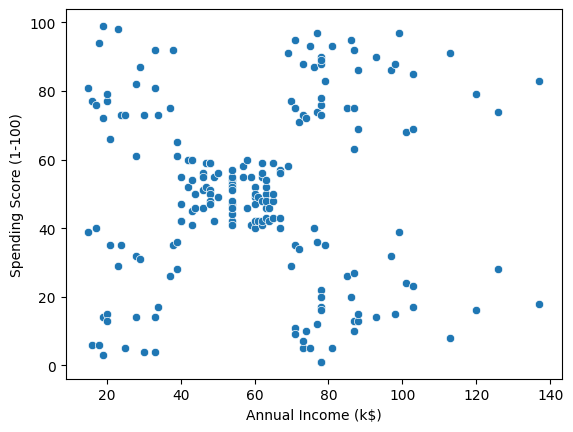

In [74]:
sns.scatterplot(data=df,x="Annual Income (k$)",y="Spending Score (1-100)")

In [93]:
#df=df.drop("CustomerID",axis=1)# Bunu sadece 1 kez çalıştırın ikinci seferde hata veriyor.

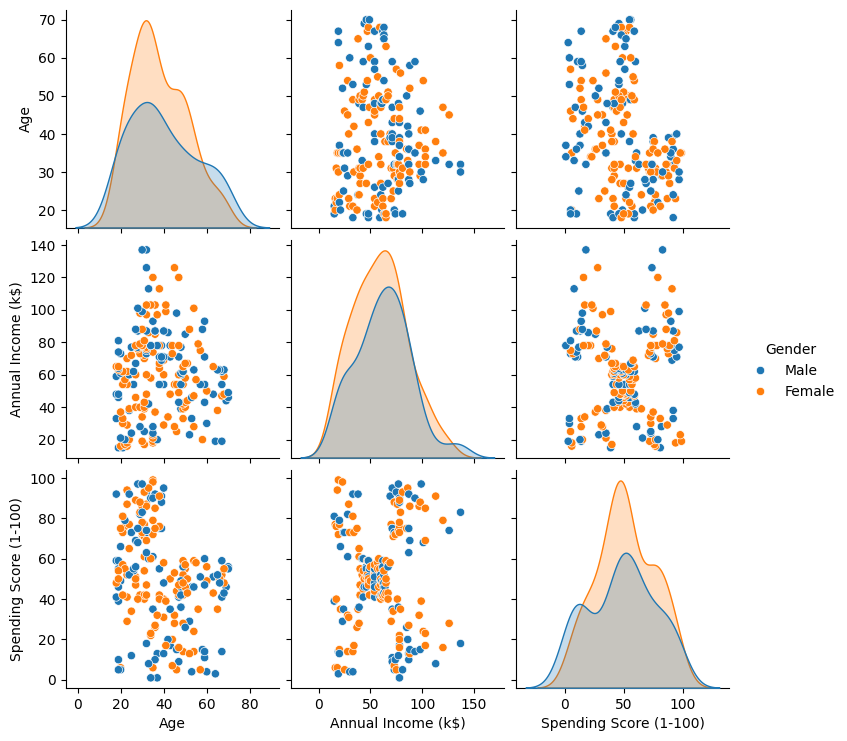

In [94]:
sns.pairplot(df,hue="Gender")

In [95]:
df.groupby("Gender")[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
#Burada cinsiyetlere göre sütun değerlerinin ortalamasını gösterdik.


,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [96]:
corr = df.corr(numeric_only=True)

<Axes: >

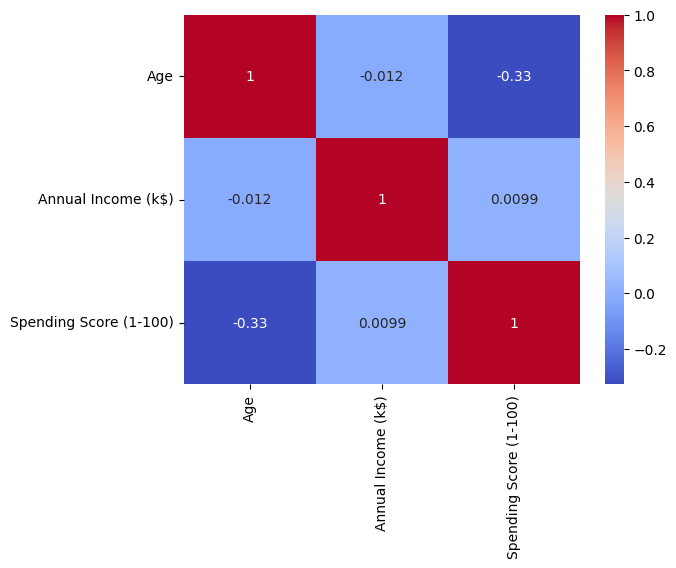

In [97]:
sns.heatmap(corr,annot=True,cmap="coolwarm")

## Kümeleme - Tek Değişkenli, İki Değişkenli, Çok Değişkenli

In [104]:
Kümeleme1= KMeans(n_clusters=6)

In [105]:
Kümeleme1.fit(df[["Annual Income (k$)"]])

KMeans(n_clusters=6)

In [106]:
Kümeleme1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5,
       5, 5])

In [107]:
df["Gelir kümesi"] = Kümeleme1.labels_
df.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Gelir kümesi
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [108]:
df["Gelir kümesi"].value_counts()

Gelir kümesi
4    54
0    50
3    42
1    32
2    16
5     6
Name: count, dtype: int64

In [109]:
Kümeleme1.inertia_ #Veri noktaları arasındaki toplam kare mesafesini ifade eder.

5443.614973544974

In [111]:
inertia_skorları = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[["Annual Income (k$)"]])
    inertia_skorları.append(kmeans.inertia_)

In [112]:
inertia_skorları

[137277.28000000003,
 49761.73701298701,
 23517.330930930926,
 14647.235170393067,
 9413.731527093594,
 5443.614973544974,
 4290.940826820239,
 3812.66571859513,
 2460.056255835668,
 2184.523160173161]

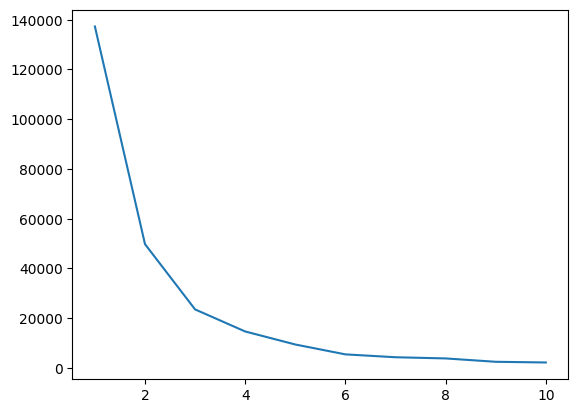

In [113]:
plt.plot(range(1,11),inertia_skorları)

In [114]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Gelir kümesi'],
      dtype='object')

In [116]:
df.groupby("Gelir kümesi")[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gelir kümesi,,,
0,41.520000,60.440000,50.060000
1,34.906250,22.000000,49.656250
2,37.812500,100.875000,52.875000
3,43.000000,42.238095,50.666667
4,36.018519,78.370370,49.555556
5,36.833333,127.666667,49.666667


## İki değişkenli kümeleme

In [121]:
Kümeleme2 = KMeans(n_clusters=5)
Kümeleme2.fit(df[["Annual Income (k$)","Spending Score (1-100)"]])
df["Harcama ve Gelir Kümesi"] = Kümeleme2.labels_              
df.head(5)  

,Gender,Age,Annual Income (k$),Spending Score (1-100),Gelir kümesi,Harcama ve Gelir Kümesi
0,Male,19,15,39,1,3
1,Male,21,15,81,1,0
2,Female,20,16,6,1,3
3,Female,23,16,77,1,0
4,Female,31,17,40,1,3


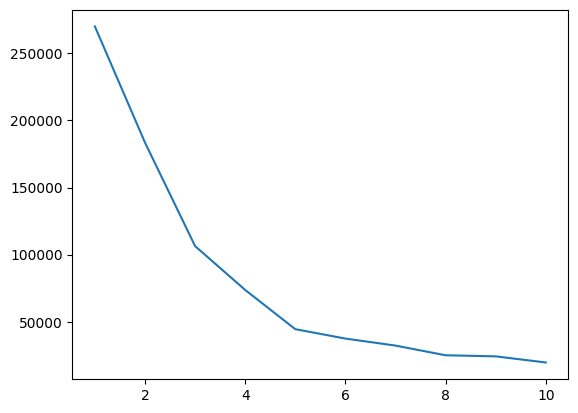

In [122]:
inertia_skorları2 = []
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[["Annual Income (k$)","Spending Score (1-100)"]])
    inertia_skorları2.append(kmeans2.inertia_)
plt.plot(range(1,11),inertia_skorları2)

In [129]:
merkezler = pd.DataFrame(Kümeleme2.cluster_centers_)
merkezler.columns = ["x","y"]
merkezler

,x,y
0,25.727273,79.363636
1,55.296296,49.518519
2,86.538462,82.128205
3,26.304348,20.913043
4,88.200000,17.114286


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

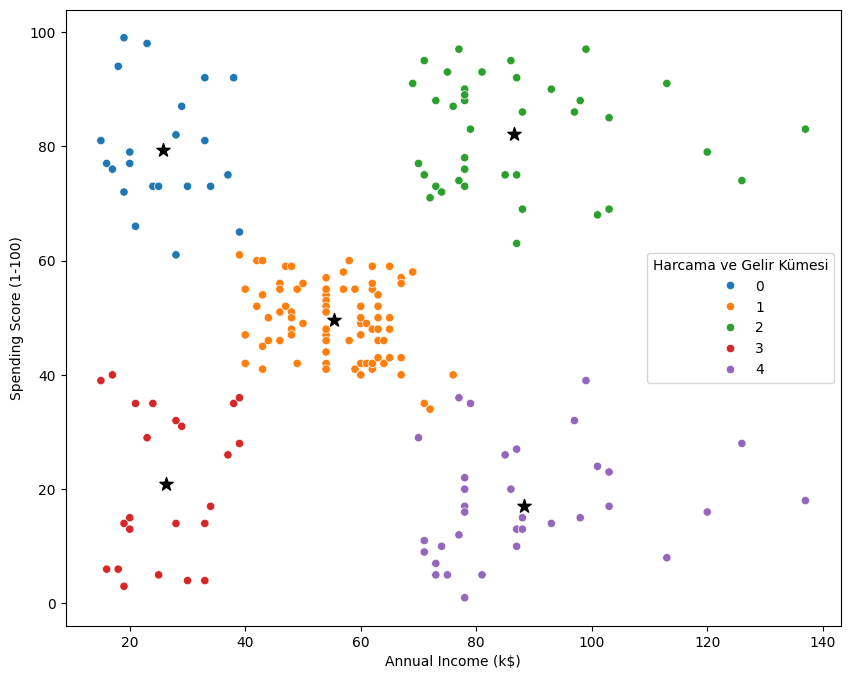

In [130]:
plt.figure(figsize=(10,8))
plt.scatter(x=merkezler["x"],y=merkezler["y"],s=100,c="black",marker="*")
sns.scatterplot(data=df,x="Annual Income (k$)",y="Spending Score (1-100)",hue="Harcama ve Gelir Kümesi",palette="tab10")